<a href="https://colab.research.google.com/github/danthonyrodriguez/Colab-Notebooks/blob/main/Copy_of_cyber_intesity_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Logistic Regression Testing.csv to Logistic Regression Testing.csv


In [3]:
#Created new csv from "merge_wc_edit_update.csv". Removed Q31-Q34 as those are now the "max" variables and targets. Also removed several columns that seemed to be added from the original analysis
data = pd.read_csv('Logistic Regression Testing.csv',na_values=[9999, '', ' ']) #read data , label 9999 and blank as missing

In [4]:
data.shape

(1099, 127)

In [ ]:
data.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q18,Q19,Q20,Q21_1,...,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Gender,Q39,Q40,Q41,Q42,Age,Region,Q45,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,Q31_Max,Q32_Max,Q33_Max,Q34_Max
0,2,3,1,1,0,0,0,0,0.0,3,4,4,4,3.0,2.0,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,NaN,1,NaN,5,1,1.0,NaN,1.0,0,1,0,5.0,NaN,1,2,2,2
1,2,2,1,0,0,0,0,0,0.0,3,5,5,5,5.0,4.0,4,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1.0,NaN,1.0,0,1,0,7.0,NaN,2,2,2,2
2,2,2,1,0,1,0,0,0,0.0,2,3,4,2,2.0,2.0,2,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3,NaN,1,1,1.0,0.0,1.0,0,1,0,6.0,0.0,5,2,2,2
3,2,3,0,0,1,0,0,0,0.0,3,4,4,4,2.0,3.0,3,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,3,NaN,1,1,1.0,NaN,1.0,0,1,0,5.0,0.0,3,2,3,2
4,2,2,1,0,0,0,0,0,0.0,2,5,4,1,2.0,3.0,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,5,NaN,2,2,1.0,NaN,1.0,0,1,0,6.0,0.0,2,0,8,0


In [5]:
#Add 4 max variables created in exercise 1 of this project
data = data.rename({'Q31_Max': 'phy_foreign_target','Q33_Max': 'phy_home_target','Q32_Max': 'cbr_foreign_target','Q34_Max': 'cbr_home_target'}, axis=1)
data.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q18,Q19,Q20,Q21_1,...,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Gender,Q39,Q40,Q41,Q42,Age,Region,Q45,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,phy_foreign_target,cbr_foreign_target,phy_home_target,cbr_home_target
0,2,3,1,1,0,0,0,0,0.0,3,4,4,4,3.0,2.0,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,NaN,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,NaN,1,NaN,5,1,1.0,NaN,1.0,0,1,0,5.0,NaN,1,2,2,2
1,2,2,1,0,0,0,0,0,0.0,3,5,5,5,5.0,4.0,4,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1.0,NaN,1.0,0,1,0,7.0,NaN,2,2,2,2
2,2,2,1,0,1,0,0,0,0.0,2,3,4,2,2.0,2.0,2,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3,NaN,1,1,1.0,0.0,1.0,0,1,0,6.0,0.0,5,2,2,2
3,2,3,0,0,1,0,0,0,0.0,3,4,4,4,2.0,3.0,3,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,3,NaN,1,1,1.0,NaN,1.0,0,1,0,5.0,0.0,3,2,3,2
4,2,2,1,0,0,0,0,0,0.0,2,5,4,1,2.0,3.0,2,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,5,NaN,2,2,1.0,NaN,1.0,0,1,0,6.0,0.0,2,0,8,0


In [ ]:
#Bypassing this block of code to create model with all columns. Will trim down later to see which variables have the most effect on the target
#imp_vars =['Q39', 'Q40', 'Gender', 'Q41', 'Q42', 'Q44', 'Age', 'Region','Q14','Q5', 'Q2','Q23', 'Q24', 'Q25', 'Q27', 'Q28', 
#           'GroupEquality', 'OutgroupAntagonism', 'TechnologicalSkill', 'Piracy', 'Nationalism', 'Patriotism', 'cbr_home_target', 'cbr_foreign_target']

In [15]:
#Renaming data frame to utilize Hiwot's bas code for the logistic regression model
dumy2=data

In [16]:
dumy2.shape

(1099, 127)

In [17]:
dumy2 = dumy2.fillna(0)

In [9]:
# This function is used to create a cyber home attack intensity target from cyber home attack as low, medium and high, three classes
def createCyberIntensity(row, col_name):
  if(row[col_name]<=1):
    return 'low'
  if(row[col_name] >1 and row[col_name]<=3):
    return 'medium'
  else:
    return 'high'

Low = cyber attack of 1 or 0, 0 is for missing and 1 is for do nothing

medium = cyber attack of 2 or 3, 2 is for post a facebook or deface a personal website

High = cyber attack >=4 

In [18]:
dumy2['cbr_home_intensity'] =dumy2.apply (lambda row: createCyberIntensity(row, 'cbr_home_target'), axis=1)

In [ ]:
dumy2['cbr_foreign_intensity'] =dumy2.apply (lambda row: createCyberIntensity(row, 'cbr_foreign_target'), axis=1)

In [ ]:
#Creating physical intensity variables. 
dumy2['phy_home_intensity'] =dumy2.apply (lambda row: createCyberIntensity(row, 'phy_home_target'), axis=1)
dumy2['phy_foreign_intensity'] =dumy2.apply (lambda row: createCyberIntensity(row, 'phy_foreign_target'), axis=1)

In [11]:
#this function is used to create a binary (0 or 1 ) target variable . for example , high cyber attack =1 else 0. 
def createTarget(row, col_name):
  if(row[col_name]=='high'):
    return 1
  else:
    return 0

In [19]:
#creating a binary variable . 
dumy2['cyber_high_target'] =dumy2.apply (lambda row: createTarget(row, 'cbr_home_intensity'), axis=1)

In [ ]:
#dumy2 = dumy2.rename({'Q39': 'educ_level','Q40': 'name_univ','Q41': 'emp_status','Q42': 'marital_status','Q44': 'country','Q14': 'fb_profile','Q5': 'share_comp','Q2': 'num_os'}, axis=1)  # renaming varialbles

In [ ]:
#pred_vars_all =['educ_level', 'name_univ', 'Gender', 'emp_status', 'marital_status', 'Age', 'Region', 'fb_profile', 'share_comp', 'Q23',
#       'Q24', 'Q25', 'Q27', 'Q28', 'GroupEquality', 'OutgroupAntagonism','TechnologicalSkill', 'Piracy', 'Nationalism', 'Patriotism']

In [ ]:
#pred_vars1=['Gender', 'Age','Region','GroupEquality', 'OutgroupAntagonism','TechnologicalSkill', 'Piracy', 'Nationalism', 'Patriotism']

In [20]:
dumy2.drop('cbr_home_intensity', axis = 1, inplace=True)
#dumy2.drop('cbr_foreign_intensity', axis = 1, inplace=True)
#dumy2.drop('phy_home_intensity', axis = 1, inplace=True)
#dumy2.drop('phy_foreign_intensity', axis = 1, inplace=True)
dumy2.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q18,Q19,Q20,Q21_1,...,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Gender,Q39,Q40,Q41,Q42,Age,Region,Q45,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,phy_foreign_target,cbr_foreign_target,phy_home_target,cbr_home_target,cyber_high_target
0,2,3,1,1,0,0,0,0,0.0,3,4,4,4,3.0,2.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,1,0.0,5,1,1.0,0.0,1.0,0,1,0,5.0,0.0,1,2,2,2,0
1,2,2,1,0,0,0,0,0,0.0,3,5,5,5,5.0,4.0,4,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0.0,1.0,0,1,0,7.0,0.0,2,2,2,2,0
2,2,2,1,0,1,0,0,0,0.0,2,3,4,2,2.0,2.0,2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,6.0,0.0,5,2,2,2,0
3,2,3,0,0,1,0,0,0,0.0,3,4,4,4,2.0,3.0,3,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,5.0,0.0,3,2,3,2,0
4,2,2,1,0,0,0,0,0,0.0,2,5,4,1,2.0,3.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,5,0.0,2,2,1.0,0.0,1.0,0,1,0,6.0,0.0,2,0,8,0,0


In [21]:
#Drop all the target variables so they don't skew the model
dumy2.drop(['cbr_home_target', 'cbr_foreign_target', 'phy_home_target', 'phy_foreign_target'], axis = 1, inplace=True)
dumy2.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q18,Q19,Q20,Q21_1,...,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Gender,Q39,Q40,Q41,Q42,Age,Region,Q45,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male,cyber_high_target
0,2,3,1,1,0,0,0,0,0.0,3,4,4,4,3.0,2.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,2.0,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,1,0.0,5,1,1.0,0.0,1.0,0,1,0,5.0,0.0,0
1,2,2,1,0,0,0,0,0,0.0,3,5,5,5,5.0,4.0,4,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,4.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0.0,1.0,0,1,0,7.0,0.0,0
2,2,2,1,0,1,0,0,0,0.0,2,3,4,2,2.0,2.0,2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,6.0,0.0,0
3,2,3,0,0,1,0,0,0,0.0,3,4,4,4,2.0,3.0,3,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,5.0,0.0,0
4,2,2,1,0,0,0,0,0,0.0,2,5,4,1,2.0,3.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,5,0.0,2,2,1.0,0.0,1.0,0,1,0,6.0,0.0,0


In [22]:
X = dumy2.drop('cyber_high_target', axis=1)
X.shape

(1099, 123)

In [23]:
y = dumy2['cyber_high_target']
y.shape

(1099,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False]
Feature Ranking: [ 57  13 103   3  53   1  66  93   2  61  31  56  60  34  32  67  65 110
 118  83 112  96  73  12  43   8   6   9  36  40  38 116  69  70  35  85
 101  81  45  37   7  51  26  29  30  20  52  80  77

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test, predictions)

array([[179,  28],
       [ 52,  16]])

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       207
           1       0.36      0.24      0.29        68

    accuracy                           0.71       275
   macro avg       0.57      0.55      0.55       275
weighted avg       0.67      0.71      0.69       275



In [ ]:
from sklearn.metrics import r2_score

#it's a bad model . 
r2_score(y_test, predictions)

-0.5629440181869854

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(X_train,y_train)
result=logit_model.fit()
print(result.summary2())

ValueError: ignored

Checking correlations with target

In [30]:

df=X
df.head()

,DataFileCountryofOrigin,Q1,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q18,Q19,Q20,Q21_1,...,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q36_16,Q36_17,Q36_18,Q36_19,Q36_20,Q36_21,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Gender,Q39,Q40,Q41,Q42,Age,Region,Q45,US_dummy,Taiwan_dummy,SouthAfrica_dummy,Total_Hour,Male
0,2,3,1,1,0,0,0,0,0.0,3,4,4,4,3.0,2.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,3.0,2.0,4.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,0.0,1,0.0,5,1,1.0,0.0,1.0,0,1,0,5.0,0.0
1,2,2,1,0,0,0,0,0,0.0,3,5,5,5,5.0,4.0,4,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,4.0,4.0,2.0,3.0,4.0,3.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,1.0,0.0,1.0,0,1,0,7.0,0.0
2,2,2,1,0,1,0,0,0,0.0,2,3,4,2,2.0,2.0,2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,6.0,0.0
3,2,3,0,0,1,0,0,0,0.0,3,4,4,4,2.0,3.0,3,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,4.0,1.0,4.0,4.0,1.0,4.0,1.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,1.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,1.0,3,0.0,1,1,1.0,0.0,1.0,0,1,0,5.0,0.0
4,2,2,1,0,0,0,0,0,0.0,2,5,4,1,2.0,3.0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,3.0,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,2.0,1.0,5,0.0,2,2,1.0,0.0,1.0,0,1,0,6.0,0.0


In [32]:
dumy2.apply(lambda x: x.corr(dumy2.cyber_high_target))

DataFileCountryofOrigin    0.089324
Q1                         0.074608
Q2_1                      -0.007689
Q2_2                      -0.048435
Q2_3                       0.072733
                             ...   
Taiwan_dummy               0.013559
SouthAfrica_dummy          0.069969
Total_Hour                 0.001941
Male                       0.122631
cyber_high_target          1.000000
Length: 124, dtype: float64

It looks like only Gender, Tech skill or piracy seems to have some correlation with the target. 

In [ ]:
df.apply(lambda x: x.corr(data['Q34_3']))

educ_level           -0.034280
name_univ            -0.009601
Gender                0.108119
emp_status            0.014063
marital_status       -0.027766
Age                   0.022000
Region                0.082752
fb_profile            0.039692
share_comp            0.048643
Q23                   0.040201
Q24                   0.036916
Q25                   0.047537
Q27                   0.060872
Q28                   0.080301
GroupEquality        -0.028128
OutgroupAntagonism   -0.041928
TechnologicalSkill    0.115666
Piracy                0.105952
Nationalism          -0.053085
Patriotism           -0.052632
dtype: float64

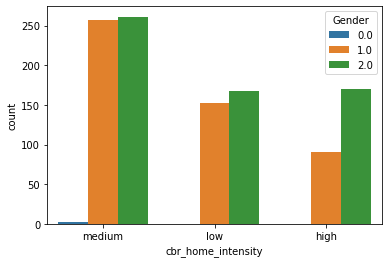

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='Gender',data=final_data)

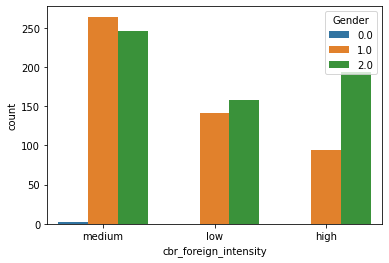

In [ ]:
sns.countplot(x='cbr_foreign_intensity',hue='Gender',data=final_data)

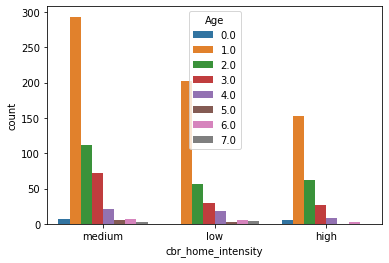

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='Age',data=final_data)

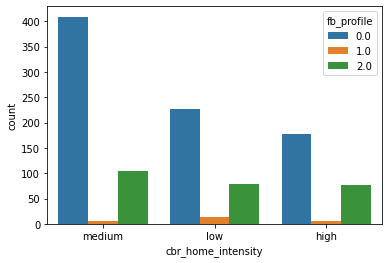

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='fb_profile',data=final_data)

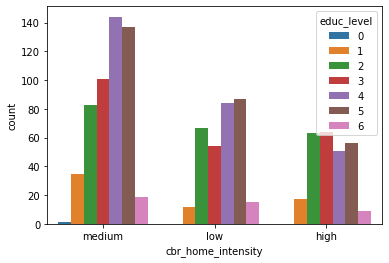

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='educ_level',data=final_data)

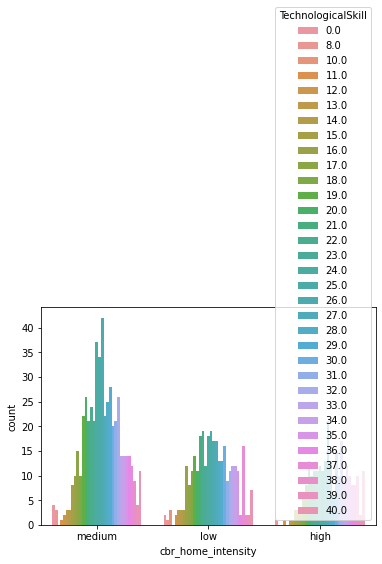

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='TechnologicalSkill',data=final_data)

In [ ]:
final_data.columns

Index(['educ_level', 'name_univ', 'Gender', 'emp_status', 'marital_status',
       'country', 'Age', 'Region', 'fb_profile', 'share_comp', 'num_os', 'Q23',
       'Q24', 'Q25', 'Q27', 'Q28', 'GroupEquality', 'OutgroupAntagonism',
       'TechnologicalSkill', 'Piracy', 'Nationalism', 'Patriotism',
       'cbr_home_target', 'cbr_foreign_target', 'cbr_home_intensity',
       'cyber_high_target', 'cbr_foreign_intensity'],
      dtype='object')

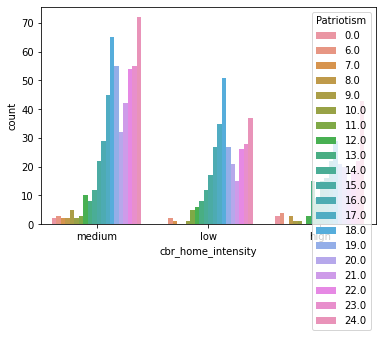

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='Patriotism',data=final_data)

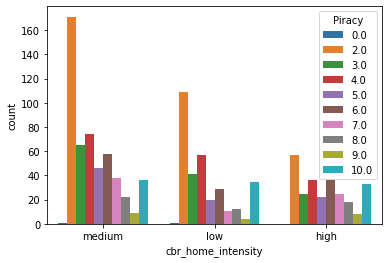

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='Piracy',data=final_data)

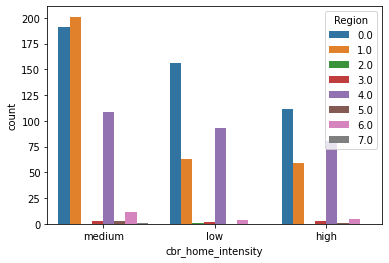

In [ ]:
sns.countplot(x='cbr_home_intensity',hue='Region',data=final_data)